# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\sulet\Downloads\customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [4]:
df.num_passengers.unique()

array([2, 1, 3, 4, 6, 5, 7, 9, 8], dtype=int64)

In [5]:
df.sales_channel.unique()

array(['Internet', 'Mobile'], dtype=object)

In [6]:
df.trip_type.unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [7]:
df.wants_extra_baggage.unique()

array([1, 0], dtype=int64)

In [8]:
df.wants_in_flight_meals.unique()

array([0, 1], dtype=int64)

In [9]:
df.wants_preferred_seat.unique()

array([0, 1], dtype=int64)

In [10]:
df.booking_origin.value_counts()

booking_origin
Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: count, Length: 104, dtype: int64

In [11]:
df.booking_complete.value_counts()

booking_complete
0    42522
1     7478
Name: count, dtype: int64

In [12]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define columns for one-hot encoding and standard scaling
categorical_cols = ['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']
numerical_cols = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']

# Define preprocessing steps
preprocessor = ColumnTransformer([
    ('encoder', OneHotEncoder(), categorical_cols),
    ('scaler', StandardScaler(), numerical_cols)
])

# Apply preprocessing to your dataframe
X_processed = preprocessor.fit_transform(df)

# Assuming 'booking_complete' is your target variable
y = df['booking_complete']

# Now you can use X_processed and y to train your prediction model

Random Forest Classifier

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred = rf_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8537
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      8520
           1       0.52      0.17      0.25      1480

    accuracy                           0.85     10000
   macro avg       0.69      0.57      0.58     10000
weighted avg       0.82      0.85      0.82     10000



Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
lr_model = LogisticRegression(random_state=42)

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)

# Print classification report
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.8522
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      8520
           1       0.51      0.06      0.10      1480

    accuracy                           0.85     10000
   macro avg       0.68      0.52      0.51     10000
weighted avg       0.81      0.85      0.80     10000



C:\Users\sulet\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


XGBoost

In [15]:
import xgboost as xgb

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", accuracy_xgb)

# Print classification report
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.8507
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      8520
           1       0.45      0.04      0.08      1480

    accuracy                           0.85     10000
   macro avg       0.65      0.52      0.50     10000
weighted avg       0.80      0.85      0.79     10000



LightBGM

In [16]:
import lightgbm as lgb

# Convert the data into LightGBM Dataset format
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

# Set the parameters for LightGBM
params = {
    'objective': 'binary',
    'metric': 'binary_error',
    'seed': 42
}

# Train the LightGBM model
lgb_model = lgb.train(params, train_data, valid_sets=[test_data])

# Make predictions
y_pred_lgb = (lgb_model.predict(X_test) > 0.5).astype(int)

# Evaluate the model
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
print("LightGBM Accuracy:", accuracy_lgb)

# Print classification report
print("LightGBM Classification Report:")
print(classification_report(y_test, y_pred_lgb))

[LightGBM] [Info] Number of positive: 5998, number of negative: 34002
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004410 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1353
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 400
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.149950 -> initscore=-1.734993
[LightGBM] [Info] Start training from score -1.734993
LightGBM Accuracy: 0.8523
LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      8520
           1       0.52      0.03      0.05      1480

    accuracy                           0.85     10000
   macro avg       0.69      0.51      0.48     10000
weighted avg       0.81      0.85      0.79     10000



C:\Users\sulet\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Info] Number of positive: 5998, number of negative: 34002
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000749 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1353
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 400
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.149950 -> initscore=-1.734993
[LightGBM] [Info] Start training from score -1.734993


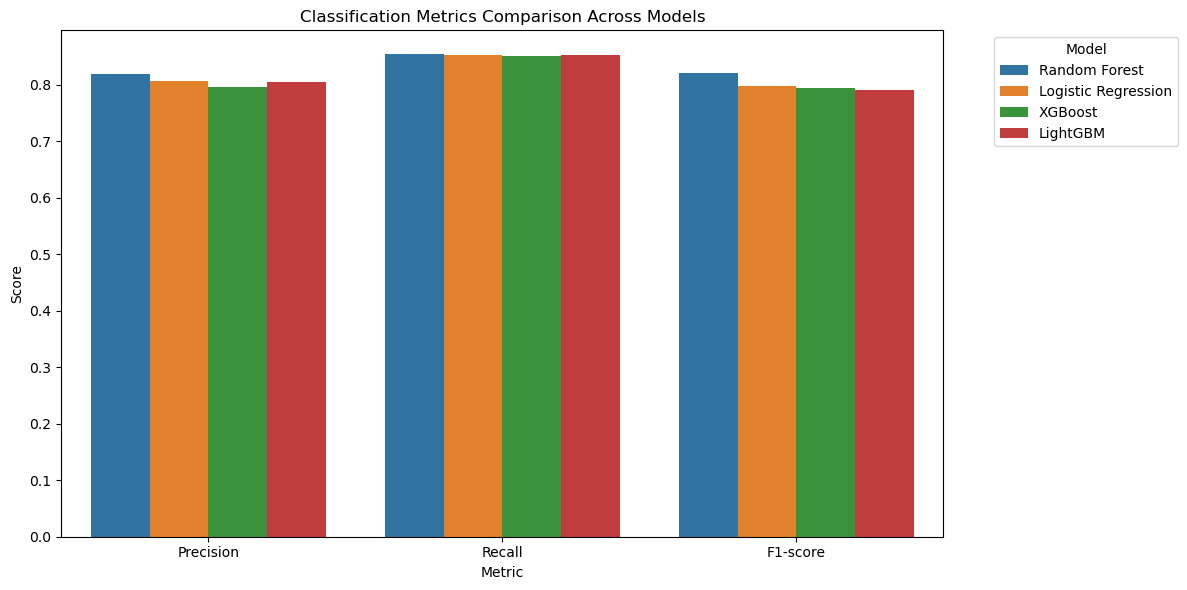

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support

# Assuming models dictionary and training code as previously defined

# Create an empty list to store the metrics for each model
metrics = []

# Calculate metrics for each model and append to the list
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    metrics.append({'Model': name, 'Precision': precision, 'Recall': recall, 'F1-score': f1_score})

# Convert the list to a DataFrame
metrics_df = pd.DataFrame(metrics)

# Melt the DataFrame to make it suitable for sns.barplot
melted_metrics_df = pd.melt(metrics_df, id_vars=["Model"], var_name="Metric", value_name="Score")

# Plotting the metrics
plt.figure(figsize=(12, 6))
sns.barplot(x='Metric', y='Score', hue='Model', data=melted_metrics_df)
plt.title('Classification Metrics Comparison Across Models')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [21]:
print(metrics_df)

                 Model  Precision  Recall  F1-score
0        Random Forest   0.818214  0.8537  0.820064
1  Logistic Regression   0.805843  0.8522  0.798188
2              XGBoost   0.796486  0.8507  0.794153
3             LightGBM   0.805279  0.8523  0.791025
